In [1]:
# import packages
import sklearn.datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

In [2]:
# load the wine quality data
wine_quality = pd.read_csv('/content/drive/MyDrive/TP/J2/winequality.csv')
wine_quality.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
wine_quality.dtypes

type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [4]:
wine_quality.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


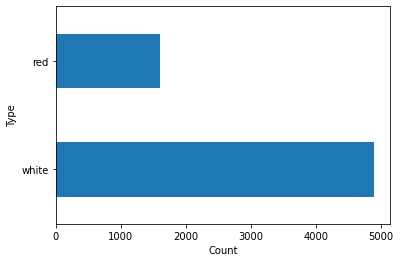

In [5]:
# plotting a graph to see types
wine_quality['type'].value_counts().plot(kind = "barh")
plt.xlabel("Count")
plt.ylabel("Type")
plt.show()


In [6]:
wine_quality = wine_quality.dropna()

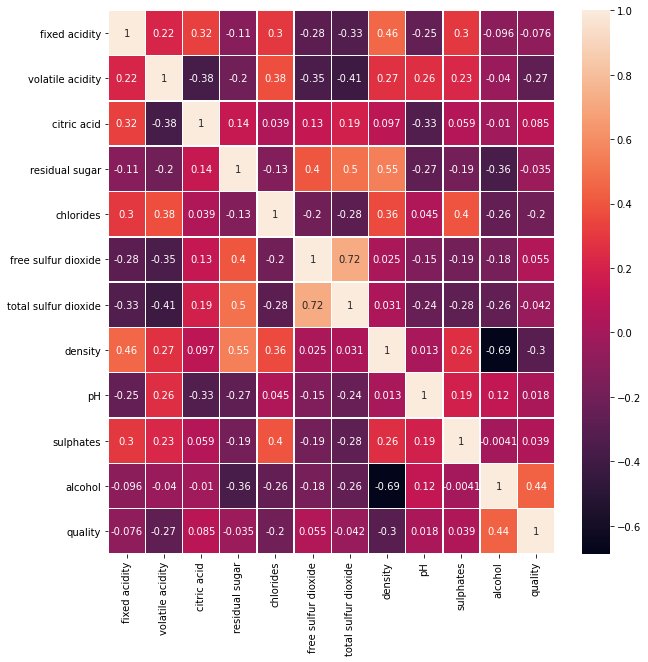

In [7]:
corrMatrix = wine_quality.corr()
plt.figure(figsize=(10, 10))
sn.heatmap(corrMatrix, annot=True, linewidths=0.5)

In [8]:
# get encoding on categorical variables
wine_quality = pd.get_dummies(wine_quality, columns=["type"], prefix=["type"])
wine_quality.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_red,type_white
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0,1


In [9]:
bins = [0, 5.99, 6.01, np.inf]
names = ['<6', '6', '6-9']
wine_quality['quality_class'] = pd.cut(wine_quality['quality'], bins, labels=names)
wine_quality.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_red,type_white,quality_class
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0,1,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0,1,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0,1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0,1,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0,1,6


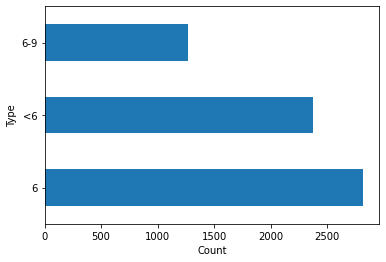

In [10]:
# plotting a graph to see classes
wine_quality['quality_class'].value_counts().plot(kind = "barh")
plt.xlabel("Count")
plt.ylabel("Type")
plt.show()

In [11]:
# encode class values as integers
Y = wine_quality['quality_class']
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
# convert integers to dummy variables (i.e. one hot encoded)
Y = np_utils.to_categorical(encoded_Y)
print(Y)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]


In [12]:
# perform scaling on the data
X = wine_quality.drop(['quality', 'quality_class'], axis = 1)
mnscaler = MinMaxScaler()
X = mnscaler.fit_transform(X)
X = pd.DataFrame(X, columns=wine_quality.drop(['quality', 'quality_class'],axis = 1).columns)

# train test split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.1, stratify = Y, random_state = 1)
X_train = X_train.values
X_test = X_test.values

In [13]:
from keras.models import Sequential
from keras.layers import *
from keras.optimizers import *

# Define the model
model = Sequential([
  Dense(512, input_dim=13, activation='relu'),
  Dropout(0.2),
  Dense(256, activation='relu'),
  Dropout(0.2),
  Dense(32, activation='relu'),
  Dense(3, activation='softmax')
])
opt = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=opt)

# Train the model
history = model.fit(
    X_train,
    Y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    shuffle=True,
    verbose=2,
)

test_error_rate = model.evaluate(X_test, Y_test, verbose=0)
print("The Accuracy for the test data set is: {}".format(test_error_rate[1]))

Epoch 1/50
146/146 - 2s - loss: 0.9544 - accuracy: 0.5135 - val_loss: 0.8845 - val_accuracy: 0.5653
Epoch 2/50
146/146 - 0s - loss: 0.8901 - accuracy: 0.5520 - val_loss: 0.8635 - val_accuracy: 0.5550
Epoch 3/50
146/146 - 0s - loss: 0.8731 - accuracy: 0.5653 - val_loss: 0.8545 - val_accuracy: 0.5704
Epoch 4/50
146/146 - 1s - loss: 0.8610 - accuracy: 0.5802 - val_loss: 0.8375 - val_accuracy: 0.5816
Epoch 5/50
146/146 - 0s - loss: 0.8603 - accuracy: 0.5737 - val_loss: 0.8364 - val_accuracy: 0.5825
Epoch 6/50
146/146 - 1s - loss: 0.8517 - accuracy: 0.5840 - val_loss: 0.8358 - val_accuracy: 0.5799
Epoch 7/50
146/146 - 1s - loss: 0.8477 - accuracy: 0.5853 - val_loss: 0.8573 - val_accuracy: 0.5816
Epoch 8/50
146/146 - 0s - loss: 0.8443 - accuracy: 0.5914 - val_loss: 0.8196 - val_accuracy: 0.6014
Epoch 9/50
146/146 - 1s - loss: 0.8415 - accuracy: 0.5881 - val_loss: 0.8115 - val_accuracy: 0.5954
Epoch 10/50
146/146 - 0s - loss: 0.8320 - accuracy: 0.5907 - val_loss: 0.8517 - val_accuracy: 0.5558

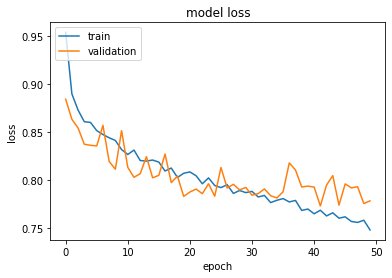

In [14]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

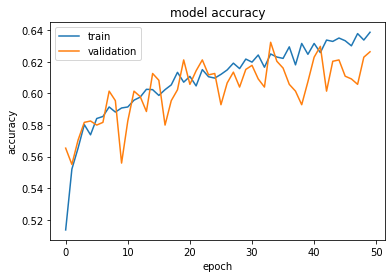

In [15]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [16]:
# get the predictions for the test data
Y_pred_labels = np.argmax(model.predict(X_test), axis=-1)

Y_test_labels = np.argmax(Y_test, axis=1)

In [17]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(0, 3)]
print(classification_report(Y_test_labels, Y_pred_labels, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.55      0.65      0.60       282
     Class 1       0.55      0.42      0.48       127
     Class 2       0.72      0.66      0.69       238

    accuracy                           0.61       647
   macro avg       0.61      0.58      0.59       647
weighted avg       0.61      0.61      0.61       647



In [18]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test_labels, Y_pred_labels))

[[184  40  58]
 [ 71  53   3]
 [ 78   3 157]]
